# Unit #6: Bootstrap Simulations

The purpose of this in-class notebook is for you to gain some experience with bootstrap simulations. You are expected to complete all exercises and turn in your work on Canvas (due date will be on the Unit #6 Classwork Canvas assignment).

## Problem #1

Let's compare the "normal theory" confidence interval to boostrap confidence intervals.

#### 1.(a) Generate a sample of size $n = 45$ from an exponential distribution with rate $\lambda = 1$. Calculate $\bar{X}$. 

In [1]:
set.seed(99)
n = 45; x = rexp(n, 1); xbar = mean(x); v = var(x); 

#### 1.(b) Calculate B = 500 bootstrap samples, each of size $n$. You might do this in a $n \times B$ matrix, for example, where each column is a boostrap sample. Then, find the mean of each bootstrap sample, denoted $\bar{X}^*_i$, for $i = 1,...,B$. 

In [16]:
B = 500; 
bs = replicate(B, sample(x, n, replace=TRUE)); dim(bs); 
muStar = colMeans(bs)

[1]  45 500

#### 1.(c) Use the quantile() function to find the 2.5th and 97.5th percentile of the distribution of each $\bar{X}^*_i$. Use these values to calculate the $95\%$ pivot boostrap confidence interval for $\mu$. 

In [19]:
l = 2*xbar - as.numeric(quantile(muStar, 0.975))
u = 2*xbar - as.numeric(quantile(muStar, 0.025))
cat("Bootstrap pivot CI: (", l, ",", u, ")")

Bootstrap pivot CI: ( 0.6764785 , 1.422193 )

#### 1.(d) Compute the appropriate "normal theory" confidence interval for $\mu$, and the bootstrap percentile confidence interval for $\mu$. 

In [25]:
l2 = xbar - 1.96*1/sqrt(n)
u2 = xbar + 1.96*1/sqrt(n)
cat("The normal CI: (", l2, ",", u2, ")\n")
l3 = as.numeric(quantile(muStar, 0.025))
u3 = as.numeric(quantile(muStar, 0.975))
cat("Bootstrap percentile CI: (", l2, ", ", u3, ")")

The normal CI: ( 0.7941865 , 1.378546 )
Bootstrap percentile CI: ( 0.7941865 ,  1.496254 )

#### 1.(e) What values can you change above to make these interval estimates closer to each other?

If there original sample size were bigger, then the bootstrap and normal theory confidence intervals would be closer.

## Problem #2

 Suppose that $X_1,...,X_8 \overset{iid}{\sim} Exp(\alpha)$. Let's use the pivot bootstrap to compute a $90\%$ confidence interval for the population variance: $Var(X_i) = 1/\alpha^2 = \theta$.


#### 2.(a) Generate a sample of size $n = 8$ from $Exp(3)$ and calculate the population variance, $\theta$ (in this example, we are generating data so that we can see how well our estimation procedure - the CI - will do).

In [32]:
n = 8; alpha = 3; 
x = rexp(n, alpha); 
1/alpha^2; 
var(x)

[1] 0.1111111

[1] 0.05219947

#### (b) Generate $B = 200$ bootstrap samples from the above sample. 

Again, use `replicate()` and `sample()`...

In [33]:
B = 200; 
boots = replicate(B, sample(x,n,replace=TRUE)); 
dim(boots)

[1]   8 200

#### (c) Calculate the MLE of $\theta$ for the original sample. Denote this as $\widehat{\theta}$. Then, calculate the MLE of $\theta$ for each bootstrap sample. Denote this as $\widehat{\theta}^*_i$, for $i = 1,...,B$. Avoid loops! (HINT: use the apply() function.)

[1] 0.05219947

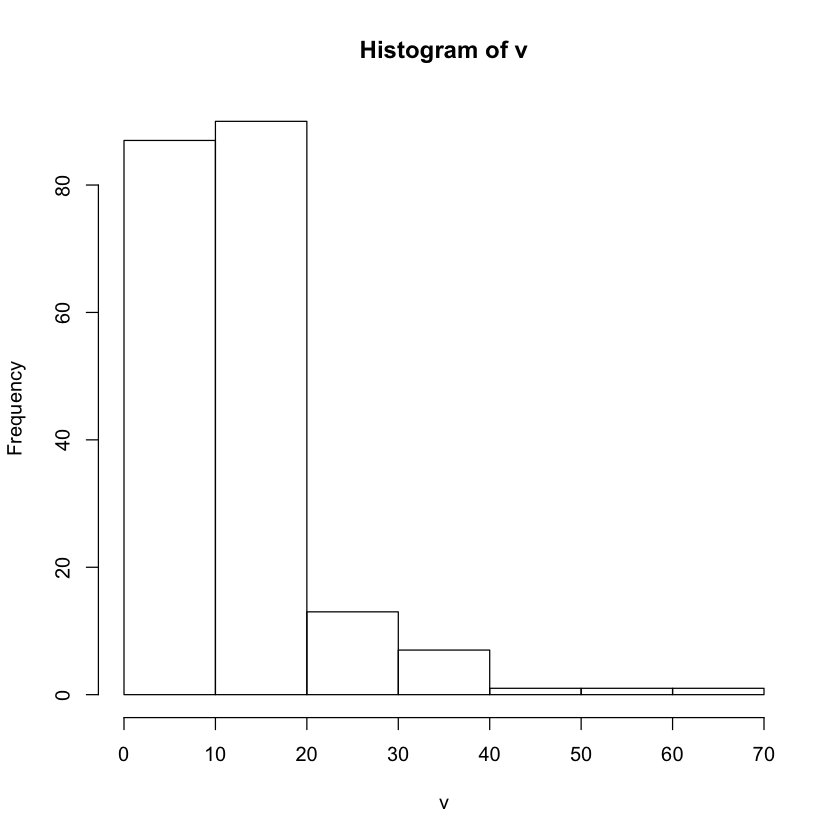

In [34]:
#se = sqrt((n-1)/n)*apply(bootsamples, 2, sd); hist(se);
#sqrt((n-1)/n)*sd(x)
f = function(x){1/mean(x)^2}
v = apply(boots,2,f); hist(v)
var(x)

#### (d) Use the quantile() function to find the 5th and 95th percentile of the distribution of $\widehat{\theta}^*_i$. Use these values to calculate the $90\%$ pivot bootstrap confidence interval for $\theta$. 

In [35]:
q = as.numeric(quantile(v, c(0.05, 0.95))); 
CI = c(2*mean(x)^2 - q[2], 2*mean(x)^2 - q[1]); 
CI

[1] -28.55793  -5.39737

#### (e) Interpret this confidence interval.

The bootstrap CI is an estimate of the "true" CL. The true CI has the property that, upon repeated sampling, 90% of the time it will cover the true $\theta$

## Problem #3 (Optional/Extra Practice)

#### (a) Generate three random samples each of size $n = 100$ from the exponential distribution with rate parameter $\alpha = 3$ Store the samples in objects rsg1, rsg2, and rsg3, respectively.


In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

#### (b) Calculate B = 500 bootstrap samples, each of size $n$. You might do this in a $n \times B$ matrix, for example, where each column is a boostrap sample. 

Use sample() and replicate() to do this. Make the result a matrix with $n=45$ rows and $B = 500$ columns. Each column is a bootstrap sample, $\mathbf{x}^*_j$.

**Then, find the mean of each bootstrap sample, denoted $\bar{x}^*_i$, for $i = 1,...,B$.**

The function colMeans() might help!

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

#### (c) Apply the mean to each bootstrap sample and store the means of the bootstrapped samples from rsg1, rsg2, and rsg3 in the objects ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3, respectively.

The function `colMeans()` might help!

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

#### (d) (STAT 5010 Only) What is the *exact* sampling distribution of $\bar{X}$? (HINT: Use moment generating functions!)

YOUR ANSWER HERE

#### (e) Compute the estimated boostrap bias of $\bar{X}$, $Bias_{\widehat{f}}[\bar{X}] = \bar{X}^* - \bar{X}$ using the values in  ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

YOUR ANSWER HERE

#### (f) Compute the estimated bootstrap standard error of $\bar{X}$ using the values in ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

#### (g) (Optional Part) Graph the distributions of $X$, $\bar{X}$, rsg1, rsg2,  rsg3, ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3. Specifically, place density estimates of rsg1, rsg2,  and rsg3 clearly beneath the distribution of $X$. Use a solid vertical line to denote $E(X)$ for all four graphs. Place a dashed vertical line in the density estimates of rsg1, rsg2,  and rsg3 at the mean of the values in the respective objects. Place density estimates of ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3 directly beneath the distribution of $\bar{X}$. Use a solid vertical line to denote $E(\bar{X})$ for all four graphs. Place a dashed vertical line in the density estimatse of ThetaHatStar1, ThetaHatStar2, and ThetaHatStar3 at the mean of the values in the respective objects.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

#### (e) (Optional Part) Discuss the bias, shape, and spread of the bootstrap distributions of $\bar{X}$.

## Problem #4 (Optional Extra Practice)

Suppose one wants to estimate the sd in the number of hours that people work in a week. One draws a random sample of size 8, and finds $\mathbf{x} = (40, 35, 40, 0, 0, 40, 50, 10)$.

#### 4.(a) Calculate $s$, the standard deviation of the sample.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

#### 4.(b) Draw $B = 500$ boostrap samples from this sample and calculate $s$ for each.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer

#### (c) Find the 95% pivot bootstrap confidence interval for the population standard deviation.

In [ ]:
#YOUR CODE HERE
fail() # No Answer - remove if you provide an answer